In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import mesa_reader as mr
from scipy import interpolate

In [2]:
mearth = 5.97e27
msun = 1.9892e33
rearth = 6.371008e8
rsun = 6.9598e10
rfrac = rsun/rearth
mfrac = msun/mearth

In [3]:
def formatstring(myfloat):
    return '%.5f'%myfloat

In [4]:
npzfile = np.load('146b_data.npz',allow_pickle=True)
list(npzfile.keys())

['masses', 'radii', 'fs', 'ages']

In [5]:
masses = npzfile['masses']
radii = npzfile['radii']
fs = npzfile['fs']
ages = npzfile['ages']

In [6]:
final_masses = np.array([masses[i][-1] for i in range(len(masses))])
final_fs = np.array([fs[i][-1] for i in range(len(fs))])
final_radii = np.array([radii[i][-1] for i in range(len(radii))])
final_ages = np.array([ages[i][-1] for i in range(len(ages))])

In [7]:
initial_masses = np.linspace(5.3,6.3,11)
initial_fs = np.logspace(-4,np.log10(2*(10**-2)),10)

In [8]:
grid_fs, grid_ms = np.meshgrid(initial_fs,initial_masses)
grid_fs, grid_ms = grid_fs.flatten(),grid_ms.flatten()
grid_points = np.array([grid_ms,grid_fs]).T

In [9]:
print(grid_ms)

[5.3 5.3 5.3 5.3 5.3 5.3 5.3 5.3 5.3 5.3 5.4 5.4 5.4 5.4 5.4 5.4 5.4 5.4
 5.4 5.4 5.5 5.5 5.5 5.5 5.5 5.5 5.5 5.5 5.5 5.5 5.6 5.6 5.6 5.6 5.6 5.6
 5.6 5.6 5.6 5.6 5.7 5.7 5.7 5.7 5.7 5.7 5.7 5.7 5.7 5.7 5.8 5.8 5.8 5.8
 5.8 5.8 5.8 5.8 5.8 5.8 5.9 5.9 5.9 5.9 5.9 5.9 5.9 5.9 5.9 5.9 6.  6.
 6.  6.  6.  6.  6.  6.  6.  6.  6.1 6.1 6.1 6.1 6.1 6.1 6.1 6.1 6.1 6.1
 6.2 6.2 6.2 6.2 6.2 6.2 6.2 6.2 6.2 6.2 6.3 6.3 6.3 6.3 6.3 6.3 6.3 6.3
 6.3 6.3]


In [10]:
interp_points = np.array([[5.35,5.45,5.62,5.77,5.844234],[grid_fs[0],grid_fs[0],grid_fs[0],grid_fs[0],grid_fs[0]]]).T

In [11]:
print(grid_points.shape,grid_points.dtype)
print(final_radii.shape,final_radii.dtype)
print(interp_points.shape,interp_points.dtype)
#interp_points=interp_points[:1]
interp_rs = interpolate.griddata(grid_points,final_radii,interp_points,method='linear')

(110, 2) float64
(110,) float64
(5, 2) float64


In [12]:
print(len(grid_ms))
print(len(grid_fs))
print(len(final_radii))
print(len(final_ages))

110
110
110
110


In [13]:
interp_rs

array([1.64835875, 1.65561987, 1.66792223, 1.67799185, 1.68319468])

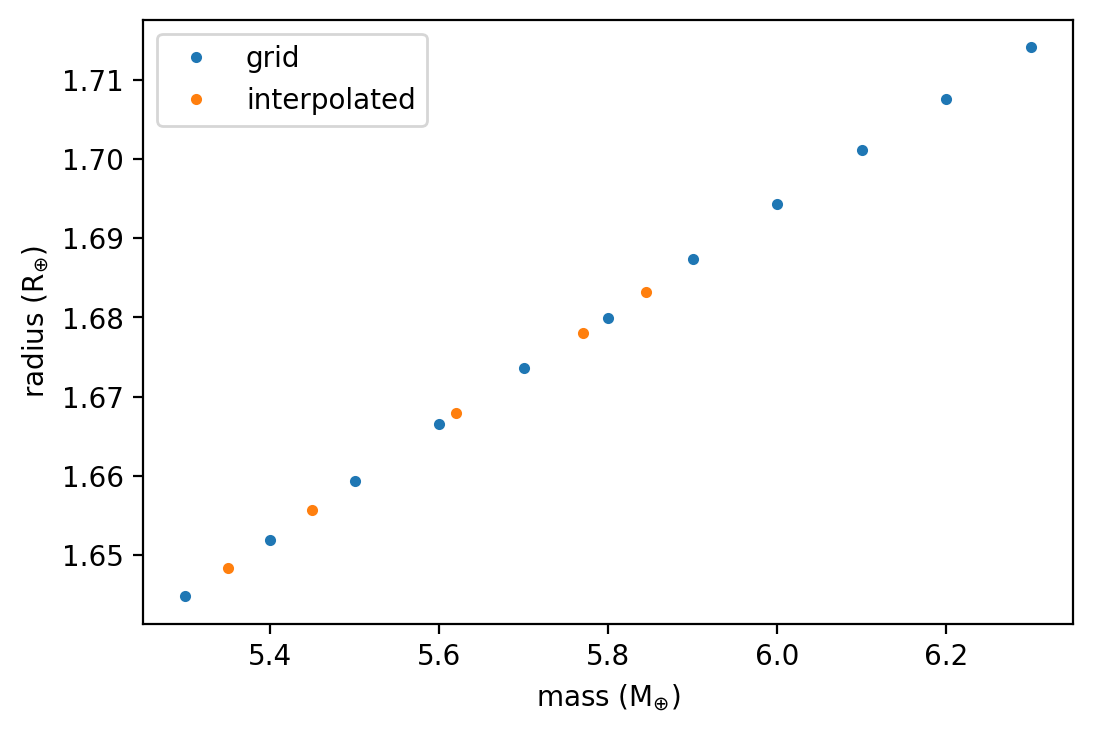

In [14]:
int_ms = [5.35,5.45,5.62,5.77,5.844234]
int_fs = [grid_fs[0],grid_fs[0],grid_fs[0],grid_fs[0],grid_fs[0]]

plt.plot(grid_ms[grid_fs==grid_fs[0]],final_radii[grid_fs==grid_fs[0]],'.',label='grid')
plt.plot(interp_points[:,0],interp_rs,'.',label='interpolated')
#plt.plot(interp_points[:,0], radius_interp(grid_ms,grid_fs,final_radii,int_ms,int_fs),'.')

ax = plt.gca()
ax.set_xlabel('mass (M$_{\oplus}$)')
ax.set_ylabel('radius (R$_{\oplus}$)')
#ax.set_xlim(5.28,6.15)

plt.gcf().set_dpi(200)
plt.legend(loc=0)

In [15]:
def radius_interp(grid_init_m, grid_init_f, grid_radius_values, interp_init_m, interp_init_f):
    #grid_init_f, grid_init_m: initial f_env and mass values fed into MESA
    #radius_values: final radii calculated by MESA
    #interp_init_f, interp_init_m: initial f_env and mass values for which to calculate interpolated R
    #all 1-d lists
    
    grid_pts = np.array([grid_init_m,grid_init_f]).T
    interp_pts = np.array([interp_init_m, interp_init_f]).T
    
    return interpolate.griddata(grid_pts, grid_radius_values, interp_pts, method='linear')

In [16]:
def mass_interp(grid_init_m, grid_init_f, grid_final_m_values, interp_init_m, interp_init_f):
    #grid_init_f, grid_init_m: initial f_env and mass values fed into MESA
    #grid_final_m_values: final masses calculated by MESA
    #interp_init_f, interp_init_m: initial f_env and mass values for which to calculate interpolated R
    #all 1-d lists
    
    grid_pts = np.array([grid_init_m,grid_init_f]).T
    interp_pts = np.array([interp_init_m, interp_init_f]).T  
    print(interp_pts.shape)
    
    return interpolate.griddata(grid_pts, grid_final_m_values, interp_pts, method='linear')

In [17]:
def f_interp(grid_init_m, grid_init_f, grid_final_f_values, interp_init_m, interp_init_f):
    #grid_init_f, grid_init_m: initial f_env and mass values fed into MESA
    #grid_final_m_values: final masses calculated by MESA
    #interp_init_f, interp_init_m: initial f_env and mass values for which to calculate interpolated R
    #all 1-d lists
    
    grid_pts = np.array([grid_init_m,grid_init_f]).T
    interp_pts = np.array([interp_init_m, interp_init_f]).T  
    #print(interp_pts)
    
    return interpolate.griddata(grid_pts, grid_final_f_values, interp_pts, method='linear')

In [18]:
#----------------------------------------------------------------------

Text(0.5, 1.0, '5 Gyr')

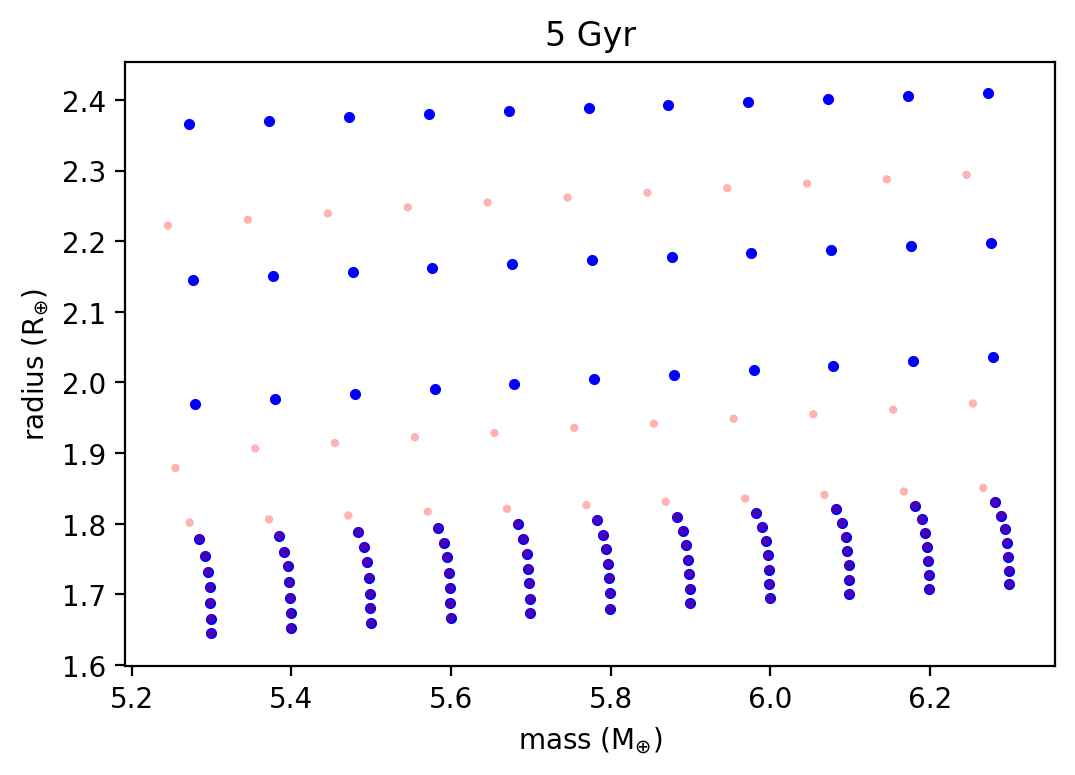

In [19]:
radii_5gyr = []
masses_5gyr = []
newage = 5.0e9

for i in range(0,len(ages)):
    if ages[i][-1] < newage:
        radii_5gyr.append(radii[i][-1])
        masses_5gyr.append(masses[i][-1])
    else:
        radii_age_interp = interpolate.interp1d(ages[i],radii[i],kind='linear')
        radii_5gyr.append(radii_age_interp(5.0e9))
        
        masses_age_interp = interpolate.interp1d(ages[i],masses[i],kind='linear')
        masses_5gyr.append(masses_age_interp(5.0e9))

for i in range(0,len(radii_5gyr)):
    plt.scatter(masses_5gyr[i],radii_5gyr[i],color='b',marker='.')
    plt.scatter(masses[i][-1],radii[i][-1],color='r',alpha=0.3,marker='.',edgecolors='none')
    
plt.gcf().set_dpi(200)
plt.gca().set_xlabel('mass (M$_{\oplus}$)')
plt.gca().set_ylabel('radius (R$_{\oplus}$)')
plt.title('5 Gyr')

In [20]:
print(len(radii[0]))
print(len(ages[0]))

243
243


In [21]:
npzfile2 = np.load('146b_data2.npz',allow_pickle=True)
masses2 = npzfile2['masses2']
radii2 = npzfile2['radii2']
fs2 = npzfile2['fs2']
ages2 = npzfile2['ages2']

In [22]:
final_masses2 = np.array([masses2[i][-1] for i in range(len(masses2))])
final_fs2 = np.array([fs2[i][-1] for i in range(len(fs2))])
final_radii2 = np.array([radii2[i][-1] for i in range(len(radii2))])
final_ages2 = np.array([ages2[i][-1] for i in range(len(ages2))])

initial_fs2 = np.linspace(0.005,0.05,10)

In [23]:
grid_ms2, grid_fs2 = np.meshgrid(initial_fs2, initial_masses)
grid_fs2, grid_ms2 = grid_fs2.flatten(),grid_ms2.flatten()
grid_points2 = np.array([grid_ms2,grid_fs2]).T

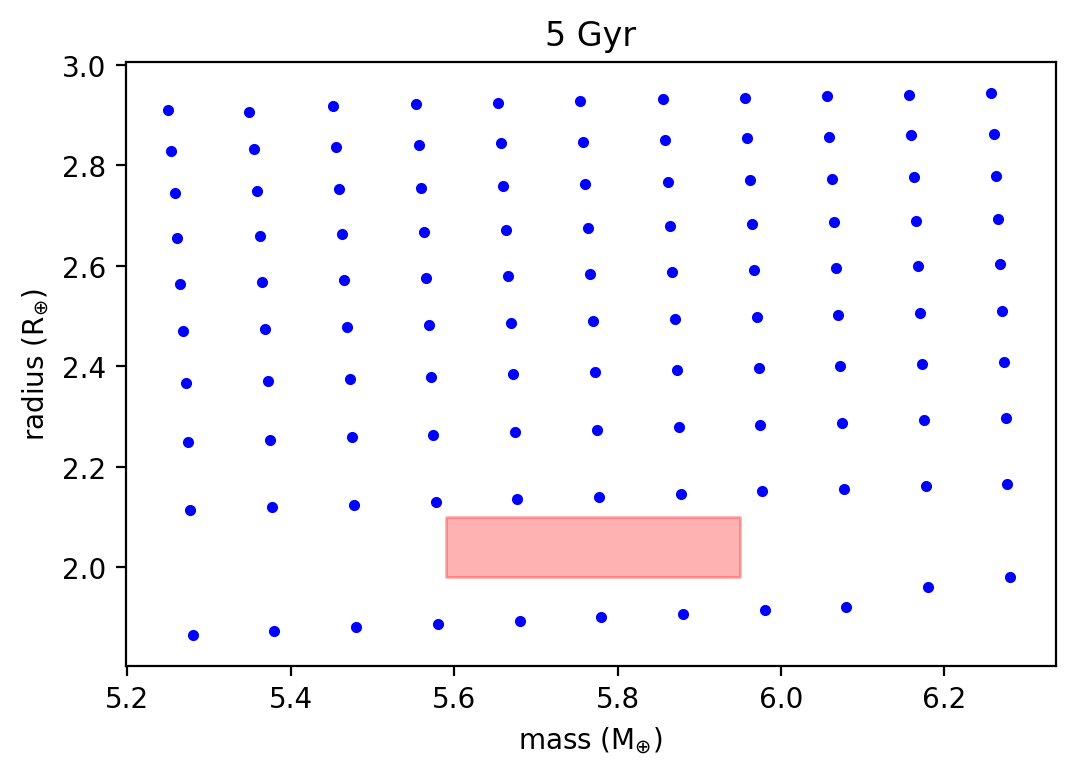

In [24]:
radii_5gyr_2 = []
masses_5gyr_2 = []
newage = 5.0e9

for i in range(0,len(ages2)):
    if ages2[i][-1] < newage:
        pass
    else:
        radii_age_interp = interpolate.interp1d(ages2[i],radii2[i],kind='linear')
        radii_5gyr_2.append(radii_age_interp(5.0e9))
        
        masses_age_interp = interpolate.interp1d(ages2[i],masses2[i],kind='linear')
        masses_5gyr_2.append(masses_age_interp(5.0e9))

for i in range(0,len(radii_5gyr_2)):
    plt.scatter(masses_5gyr_2[i],radii_5gyr_2[i],color='b',marker='.')
    #plt.scatter(masses2[i][-1],radii2[i][-1],color='r',alpha=0.3,marker='.',edgecolors='none')
    
plt.gcf().set_dpi(200)
plt.gca().set_xlabel('mass (M$_{\oplus}$)')
plt.gca().set_ylabel('radius (R$_{\oplus}$)')
plt.title('5 Gyr')

meas_m = 5.77
delta_meas_m = 0.18
meas_r = 2.04
delta_meas_r = 0.06
plt.gca().fill_between([meas_m - delta_meas_m, meas_m + delta_meas_m],meas_r - delta_meas_r,meas_r + delta_meas_r,
                  color='red',alpha=0.3)

In [25]:
npzfile3 = np.load('146b_data3.npz',allow_pickle=True)
masses3 = npzfile3['masses3']
radii3 = npzfile3['radii3']
fs3 = npzfile3['fs3']
ages3 = npzfile3['ages3']

In [26]:
final_masses3 = np.array([masses3[i][-1] for i in range(len(masses3))])
final_fs3 = np.array([fs3[i][-1] for i in range(len(fs3))])
final_radii3 = np.array([radii3[i][-1] for i in range(len(radii3))])
final_ages3 = np.array([ages3[i][-1] for i in range(len(ages3))])

initial_fs3 = np.linspace(0.004,0.014,11)

In [27]:
grid_fs3, grid_ms3 = np.meshgrid(initial_fs3, initial_masses)
grid_fs3, grid_ms3 = grid_fs3.flatten(),grid_ms3.flatten()
grid_points3 = np.array([grid_ms3,grid_fs3]).T

In [28]:
radii_5gyr_3 = []
masses_5gyr_3 = []
newage = 5.0e9

for i in range(0,len(ages3)):
    if ages3[i][-1] < newage:
        radii_5gyr_3.append(np.nan)
        masses_5gyr_3.append(np.nan)
        
    else:
        radii_age_interp = interpolate.interp1d(ages3[i],radii3[i],kind='linear')
        radii_5gyr_3.append(radii_age_interp(newage))
        
        masses_age_interp = interpolate.interp1d(ages3[i],masses3[i],kind='linear')
        masses_5gyr_3.append(masses_age_interp(newage))

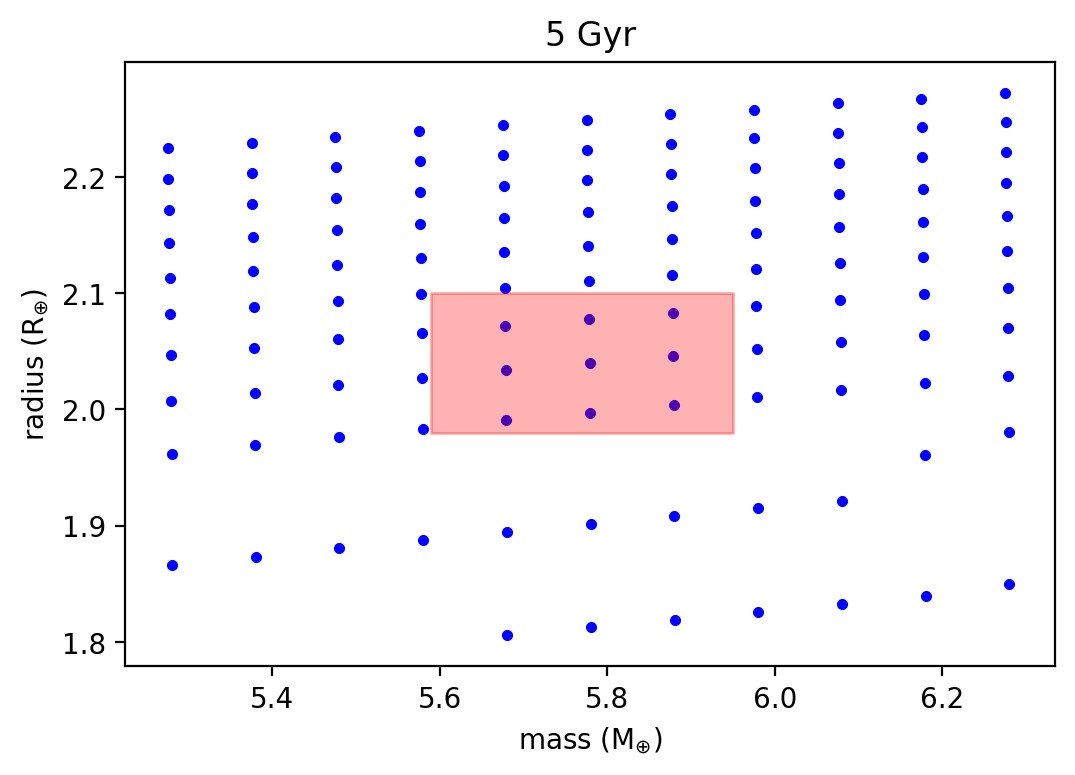

In [29]:
for i in range(0,len(radii_5gyr_3)):
    plt.scatter(masses_5gyr_3[i],radii_5gyr_3[i],color='b',marker='.')
    #plt.scatter(masses2[i][-1],radii2[i][-1],color='r',alpha=0.3,marker='.',edgecolors='none')
    
plt.gcf().set_dpi(200)
plt.gca().set_xlabel('mass (M$_{\oplus}$)')
plt.gca().set_ylabel('radius (R$_{\oplus}$)')
plt.title('5 Gyr')

meas_m = 5.77
delta_meas_m = 0.18
meas_r = 2.04
delta_meas_r = 0.06
plt.gca().fill_between([meas_m - delta_meas_m, meas_m + delta_meas_m],meas_r - delta_meas_r,meas_r + delta_meas_r,
                  color='red',alpha=0.3)

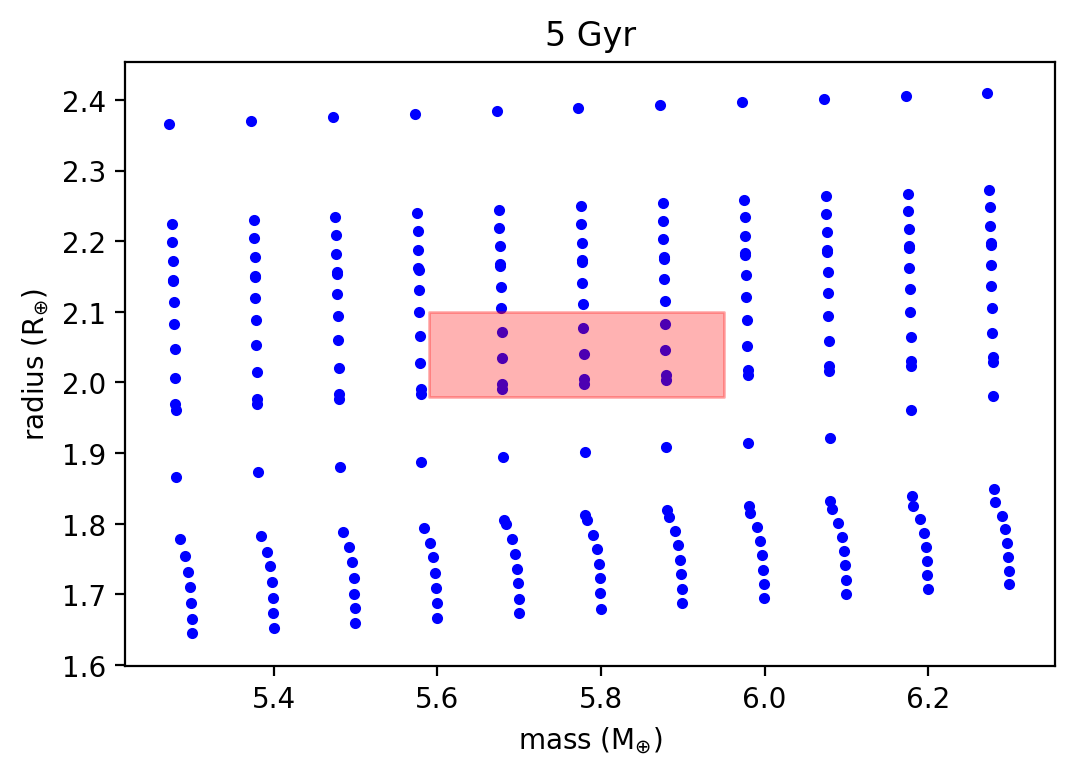

In [30]:
for i in range(0,len(radii_5gyr)):
    plt.scatter(masses_5gyr[i],radii_5gyr[i],color='b',marker='.')
    
for i in range(0,len(radii_5gyr_3)):
    plt.scatter(masses_5gyr_3[i],radii_5gyr_3[i],color='b',marker='.')
    
plt.gcf().set_dpi(200)
plt.gca().set_xlabel('mass (M$_{\oplus}$)')
plt.gca().set_ylabel('radius (R$_{\oplus}$)')
plt.title('5 Gyr')

meas_m = 5.77
delta_meas_m = 0.18
meas_r = 2.04
delta_meas_r = 0.06
plt.gca().fill_between([meas_m - delta_meas_m, meas_m + delta_meas_m],meas_r - delta_meas_r,meas_r + delta_meas_r,
                  color='red',alpha=0.3)

In [31]:
#----------------------------------------------------------------------

In [32]:
dense_ms = np.linspace(initial_masses.min(),initial_masses.max(),250)
dense_fs = np.linspace(initial_fs3.min(),initial_fs3.max(),250)
dense_ms, dense_fs = np.meshgrid(dense_ms, dense_fs)
dense_ms, dense_fs = dense_ms.flatten(), dense_fs.flatten()

intd_masses = mass_interp(grid_ms3, grid_fs3, masses_5gyr_3, dense_ms, dense_fs)

intd_radii = radius_interp(grid_ms3, grid_fs3, radii_5gyr_3, dense_ms, dense_fs)
                           
#intd_fs = f_interp(grid_ms3, grid_fs3, final_fs3, dense_ms, dense_fs)

(62500, 2)


In [33]:
shapified_masses = intd_masses.reshape(250,250)
#shapified_fs = intd_fs.reshape(250,250)
shapified_radii = intd_radii.reshape(250,-1)

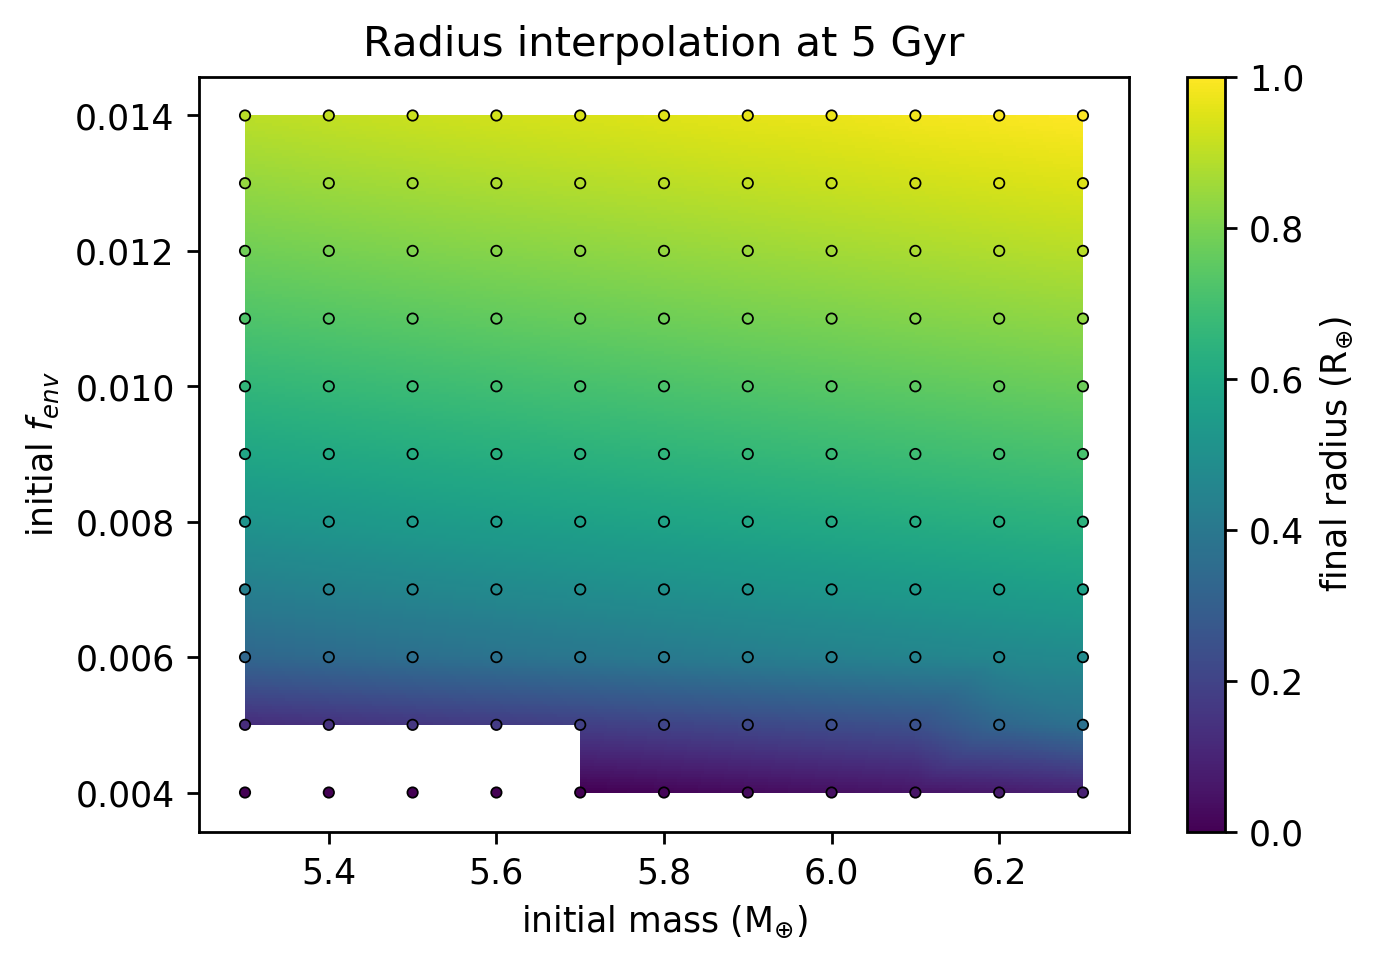

In [34]:
cmap = plt.get_cmap('viridis')

plt.imshow(
shapified_radii,interpolation=None,
    extent = [dense_ms.min(),dense_ms.max(),(dense_fs.min()),(dense_fs.max())],origin='lower',aspect='auto'
)

#plt.plot(5.8,-2,color=plt.get_cmap('viridis')(0.75),marker='.',markeredgewidth=0.5,markeredgecolor='k')

minrad = np.nanmin(radii_5gyr_3)
maxrad = np.nanmax(radii_5gyr_3)
radii_5gyr_3 = np.array(radii_5gyr_3).flatten()
colors = []

for i in range(0,len(radii_5gyr_3)):
    if radii_5gyr_3[i] != np.nan:
        thiscolor = (radii_5gyr_3[i] - minrad) / (maxrad - minrad)
        #print(thiscolor)
        colors.append(cmap(thiscolor))
        
plt.scatter(grid_ms3,grid_fs3,marker='.',color=colors,lw=0.5,edgecolor='k')

cbar = plt.colorbar()
plt.gcf().set_dpi(250)
plt.gcf().set_facecolor('white')

plt.gca().set_xlabel('initial mass (M$_{\oplus}$)')
plt.gca().set_ylabel('initial $f_{env}$')
plt.title('Radius interpolation at 5 Gyr')
cbar.set_label('final radius (R$_{\oplus}$)')

In [35]:
print(cmap(np.nan))
print(cmap(0))

(0.267004, 0.004874, 0.329415, 1.0)
(0.267004, 0.004874, 0.329415, 1.0)


In [36]:
interpolator = interpolate.LinearNDInterpolator(np.column_stack((grid_ms3,grid_fs3)), radii_5gyr_3)
%timeit (interpolator(6.25,0.005))

26 µs ± 1.07 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [37]:
#print(np.column_stack((grid_ms3,grid_fs3)))

In [38]:
#help(interpolator)

62500


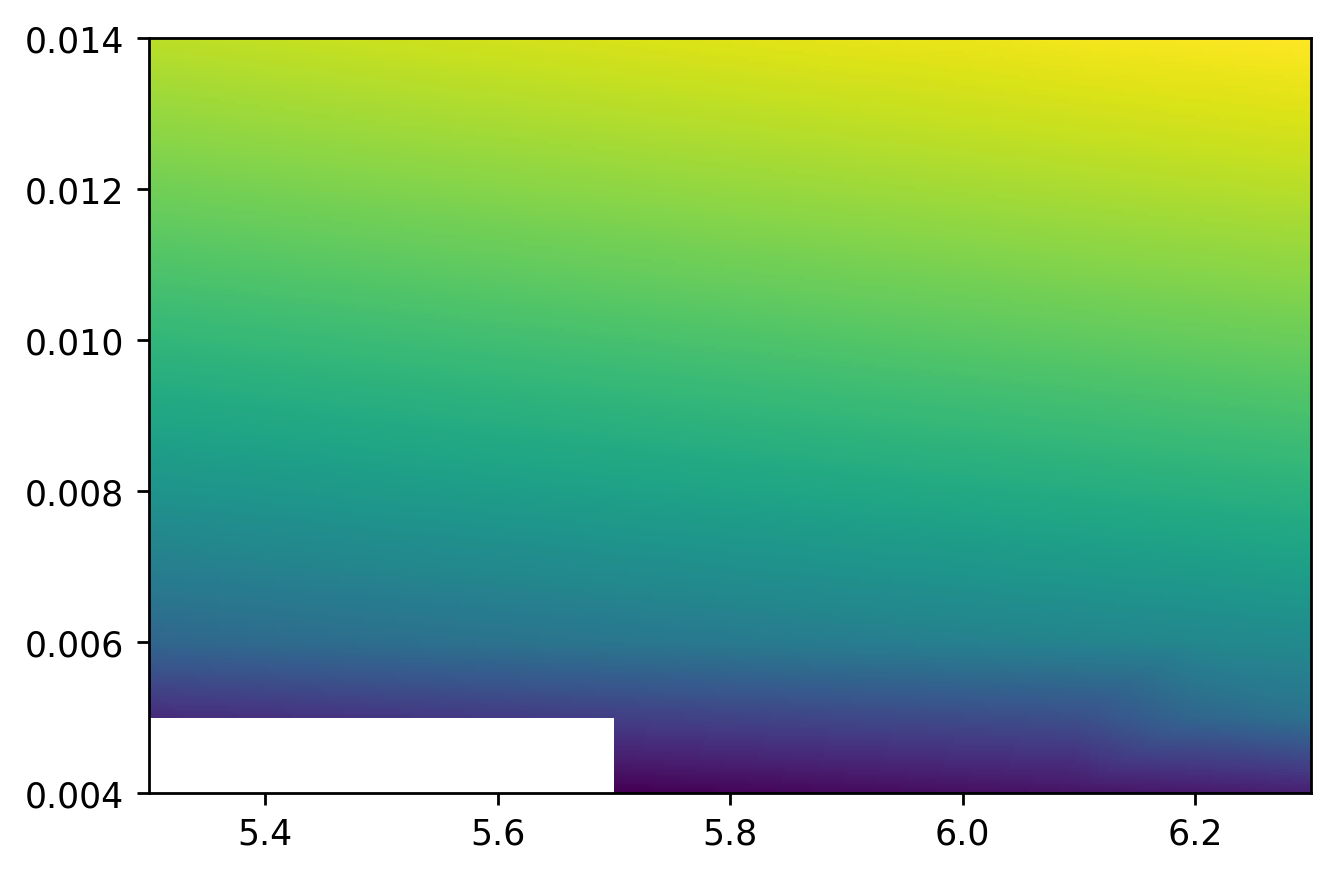

In [72]:
newintd_ms = []
newintd_rs = []

for i in range(len(dense_ms)):
    newintd_rs.append(interpolator((dense_ms[i], dense_fs[i])))
    
print(len(newintd_rs))
newshapers = np.array(newintd_rs).reshape(250,-1)
plt.imshow(newshapers,interpolation=None,
           extent = [dense_ms.min(),dense_ms.max(),(dense_fs.min()),(dense_fs.max())],
           origin='lower',aspect='auto')
plt.gcf().set_dpi(250)